In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

#### MPT
Modern Portfolio Theory (MPT)
Modern Portfolio Theory, or also known as mean-variance analysis is a mathematical process which allows the user to maximize returns for a given risk level.

MPT encourages diversification of assets. It says that a high variance asset A if combined with diverse assets B and C, where A, B and C have little to no correlation, can give us a portfolio with low variance on returns.

#### Efficient frontier
Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return.


In [4]:
# Read Data
test = data.DataReader(['TSLA', 'FB'], 'yahoo', start='2018/01/01', end='2019/12/31')

# Closing price
test = test['Adj Close']
test.head()

Symbols,TSLA,FB
Date,,
2018-01-02,64.106003,181.419998
2018-01-03,63.450001,184.669998
2018-01-04,62.924000,184.330002
2018-01-05,63.316002,186.850006
2018-01-08,67.281998,188.279999


In [6]:
# Log of percentage change
tesla = test['TSLA'].pct_change().apply(lambda x: np.log(1+x)) #log(-x)小于零

#### Variance
The variance in prices of stocks of Tesla are an important indicator of how volatile this investment will be (how returns can fluctuate).


In [7]:
# Variance
var_tesla = tesla.var()
var_tesla

0.0011483734269334596

In [9]:
# Log of Percentage change for Facebook
fb = test['FB'].pct_change().apply(lambda x: np.log(1+x))

# Variance
var_fb = fb.var()
var_fb

0.00045697258417022536

#### Volatility
Volatility is measured as the standard deviation of a company’s stock.

But volatility for the annual standard deviation. What we get from square root of variance is the daily standard deviation. To convert it to annual standard deviation we multiply the variance by 250.

In [10]:
# Volatility
tesla_vol = np.sqrt(var_tesla * 250)
fb_vol = np.sqrt(var_fb * 250)
tesla_vol, fb_vol

(0.5358109337568289, 0.33799873674698305)

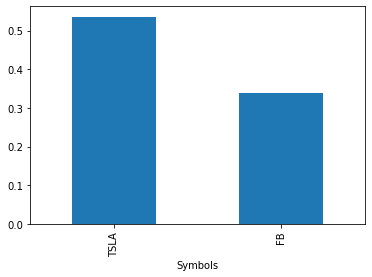

In [11]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar');

#### Covariance
Covariance measures the directional relationship between the returns on two assets.

A positive covariance means that returns of the two assets move together while a negative covariance means they move inversely.
#### Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.

In [13]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Symbols,TSLA,FB
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,0.017756
2018-01-04,-0.008325,-0.001843
2018-01-05,0.006210,0.013579
2018-01-08,0.060755,0.007624


In [14]:
# Covariance
test1['TSLA'].cov(test1['FB']) # very small positive cov between tesla and facebook

0.0001826162315603096

#### Correlation
Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

In [15]:
test1['TSLA'].corr(test1['FB']) 

0.2520883272466129

#### Expected Returns
Expected returns of an asset are simply the mean of percentage change in its stock prices. So, the value of expected return we obtain here are daily expected returns.

For an yearly expected return value, you will need to resample the data year-wise.

For expected returns, you need to define weights for the assets choosen.

In simpler terms, this means you need to decide what percentage of your total money to you want to hold in each company’s stock.

Usually this decision is done by using the optimization techniques we will discuss later but for now we will consider random weights for Tesla and Facebook.

In [16]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Symbols,TSLA,FB
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,0.017756
2018-01-04,-0.008325,-0.001843
2018-01-05,0.006210,0.013579
2018-01-08,0.060755,0.007624


#### Weights
Let’s define an array of random weights for the purpose of calculation. These weights will represent the percentage allocation of investments between these two stocks. They must add up to 1.

So, the problem of portfolio optimization is nothing but to find the optimal values of weights that maximizes expected returns while minimizing the risk (standard deviation).

In [17]:
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

Symbols
TSLA    0.000530
FB      0.000246
dtype: float64

#### Total expected return
𝐸(𝑅𝑝)=𝑤1𝐸(𝑅1)+𝑤2𝐸(𝑅2)+…..𝑤𝑛𝐸(𝑅𝑛)

In [18]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r

0.0003027691524101118